# ***Libraries***

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import json

# ***Time-Series Data Generation***

In [17]:
def count_files_and_organize_by_subfolder(folder_path):
    subfolder_files = {}

    for subdir, _, files in os.walk(folder_path):
        subfolder_name = os.path.basename(subdir)
        if subfolder_name not in subfolder_files:
            subfolder_files[subfolder_name] = []

        subfolder_files[subfolder_name].extend(files)

    return subfolder_files

def print_subfolder_files_info(subfolder_files):
    for subfolder, files in subfolder_files.items():
        print(f"Subfolder: {subfolder}")
        #for file in files:
            #print(f"  File: {file}")
        print(f"Number of files in '{subfolder}': {len(files)}\n")

In [18]:
tsb_uad_pub_folder_path = '../TSB-UAD-Public/TSB-UAD-Public'
subfolder_files = count_files_and_organize_by_subfolder(tsb_uad_pub_folder_path)
del subfolder_files['TSB-UAD-Public']
print_subfolder_files_info(subfolder_files)

Subfolder: NASA-MSL
Number of files in 'NASA-MSL': 54

Subfolder: KDD21
Number of files in 'KDD21': 250

Subfolder: MITDB
Number of files in 'MITDB': 32

Subfolder: SVDB
Number of files in 'SVDB': 115

Subfolder: NASA-SMAP
Number of files in 'NASA-SMAP': 108

Subfolder: MGAB
Number of files in 'MGAB': 10

Subfolder: Genesis
Number of files in 'Genesis': 6

Subfolder: YAHOO
Number of files in 'YAHOO': 367

Subfolder: OPPORTUNITY
Number of files in 'OPPORTUNITY': 465

Subfolder: GHL
Number of files in 'GHL': 126

Subfolder: ECG
Number of files in 'ECG': 53

Subfolder: SMD
Number of files in 'SMD': 281

Subfolder: IOPS
Number of files in 'IOPS': 58

Subfolder: Occupancy
Number of files in 'Occupancy': 10

Subfolder: NAB
Number of files in 'NAB': 58

Subfolder: Dodgers
Number of files in 'Dodgers': 1

Subfolder: Daphnet
Number of files in 'Daphnet': 45

Subfolder: SensorScope
Number of files in 'SensorScope': 23



In [19]:
def create_normality_dicts(subfolder_files):
    # Create Normality_1
    normality_1 = {}
    for subfolder, files in subfolder_files.items():
        if files:
            num_files_to_take = min(random.randint(1, 3), len(files))
            normality_1[subfolder] = random.sample(files, num_files_to_take)
    
    # Create Normality_2
    normality_2 = {}
    subfolder_list = list(normality_1.keys())
    for i in range(len(subfolder_list)):
        for j in range(i + 1, len(subfolder_list)):
            subfolder_a = subfolder_list[i]
            subfolder_b = subfolder_list[j]
            files_a = normality_1[subfolder_a]
            files_b = normality_1[subfolder_b]
            if files_a and files_b:
                file_a = random.choice(files_a)
                file_b = random.choice(files_b)
                key = f"{file_a}+{file_b}"
                normality_2[key] = (subfolder_a, subfolder_b)
    
    # Create Normality_3
    normality_3 = {}
    for i in range(len(subfolder_list)):
        for j in range(i + 1, len(subfolder_list)):
            for k in range(j + 1, len(subfolder_list)):
                subfolder_a = subfolder_list[i]
                subfolder_b = subfolder_list[j]
                subfolder_c = subfolder_list[k]
                files_a = normality_1[subfolder_a]
                files_b = normality_1[subfolder_b]
                files_c = normality_1[subfolder_c]
                if files_a and files_b and files_c:
                    file_a = random.choice(files_a)
                    file_b = random.choice(files_b)
                    file_c = random.choice(files_c)
                    key = f"{file_a}+{file_b}+{file_c}"
                    normality_3[key] = (subfolder_a, subfolder_b, subfolder_c)

    return normality_1, normality_2, normality_3

In [20]:
normality_1, normality_2, normality_3 = create_normality_dicts(subfolder_files)

In [22]:
print("Normality_1:")
for key, value in normality_1.items():
    print(f"{key}: {value}")

print("\nNormality_2:")
for key, value in normality_2.items():
    print(f"{key}: {value}")

print("\nNormality_3:")
for key, value in normality_3.items():
    print(f"{key}: {value}")

Normality_1:
NASA-MSL: ['F-8.test.out']
KDD21: ['242_UCR_Anomaly_tilt12744mtable_100000_104630_104890.out', '166_UCR_Anomaly_apneaecg_10000_12240_12308.out', '083_UCR_Anomaly_DISTORTEDresperation9_38000_143411_143511.out']
MITDB: ['223.test.csv@2.out', '234.test.csv@1.out']
SVDB: ['893.test.csv@2.out']
NASA-SMAP: ['D-5.train.out', 'A-9.test.out', 'A-4.train.out']
MGAB: ['2.test.out', '4.test.out']
Genesis: ['genesis-anomalies.test.csv@6.out']
YAHOO: ['Yahoo_A2synthetic_72_data.out']
OPPORTUNITY: ['S4-ADL3.test.csv@124.out', 'S4-ADL4.test.csv@120.out']
GHL: ['05_Lev_fault_Temp_corr_seed_27_vars_23.test.csv@8.out']
ECG: ['MBA_ECG14046_data_38.out', 'MBA_ECG801_data.out']
SMD: ['machine-3-7.test.csv@7.out', 'machine-3-6.test.csv@9.out', 'machine-2-8.test.csv@7.out']
IOPS: ['KPI-0efb375b-b902-3661-ab23-9a0bb799f4e3.test.out', 'KPI-f0932edd-6400-3e63-9559-0a9860a1baa9.train.out', 'KPI-adb2fde9-8589-3f5b-a410-5fe14386c7af.train.out']
Occupancy: ['room-occupancy-0.test.csv@3.out']
NAB: ['NAB_

In [29]:
def create_combined_norm_dict(normality_1, normality_2, normality_3):
    combined_dict = {}
    counts = {"Normality_1": 0, "Normality_2": 0, "Normality_3": 0}

    # Adding from Normality_1
    for subfolder, files in normality_1.items():
        for file in files:
            if file not in combined_dict:
                combined_dict[file] = ["Normality_1", subfolder]
                counts["Normality_1"] += 1

    # Adding from Normality_2
    for key, subfolders in normality_2.items():
        if key not in combined_dict:
            combined_dict[key] = ["Normality_2", subfolders[0], subfolders[1]]
            counts["Normality_2"] += 1

    # Adding from Normality_3
    for key, subfolders in normality_3.items():
        if key not in combined_dict:
            combined_dict[key] = ["Normality_3", subfolders[0], subfolders[1], subfolders[2]]
            counts["Normality_3"] += 1

    return combined_dict, counts

In [30]:
combined_norm_dict, counts = create_combined_norm_dict(normality_1, normality_2, normality_3)

In [31]:
print("\nCounts of filenames from each normality:")
for normality, count in counts.items():
    print(f"{normality}: {count}")


Counts of filenames from each normality:
Normality_1: 33
Normality_2: 153
Normality_3: 816


In [32]:
normality_1_count = 5
normality_2_count = 5
normality_3_count = 5

In [33]:
def create_predefined_dict(combined_dict, normality_1_count, normality_2_count, normality_3_count):
    predefined_dict = {"Normality_1": {}, "Normality_2": {}, "Normality_3": {}}
    
    # Extracting specific numbers of items from each normality type
    normality_1_items = [item for item in combined_dict.items() if item[1][0] == "Normality_1"]
    normality_2_items = [item for item in combined_dict.items() if item[1][0] == "Normality_2"]
    normality_3_items = [item for item in combined_dict.items() if item[1][0] == "Normality_3"]
    
    # Select predefined numbers of items
    selected_normality_1_items = random.sample(normality_1_items, min(normality_1_count, len(normality_1_items)))
    selected_normality_2_items = random.sample(normality_2_items, min(normality_2_count, len(normality_2_items)))
    selected_normality_3_items = random.sample(normality_3_items, min(normality_3_count, len(normality_3_items)))
    
    # Combine selected items into the predefined_dict
    predefined_dict["Normality_1"] = dict(selected_normality_1_items)
    predefined_dict["Normality_2"] = dict(selected_normality_2_items)
    predefined_dict["Normality_3"] = dict(selected_normality_3_items)
    
    # Combine all selected items into a single dictionary
    all_selected_items = selected_normality_1_items + selected_normality_2_items + selected_normality_3_items
    
    # Shuffle the combined selected items
    random.shuffle(all_selected_items)
    
    # Convert to a dictionary
    shuffled_dict = dict(all_selected_items)
    
    return shuffled_dict

In [34]:
predefined_shuffled_dict = create_predefined_dict(combined_norm_dict, normality_1_count, normality_2_count, normality_3_count)

In [35]:
print("Predefined Shuffled Dictionary:")
for key, value in predefined_shuffled_dict.items():
    print(f"{key}: {value}")

Predefined Shuffled Dictionary:
room-occupancy-0.test.csv@3.out: ['Normality_1', 'Occupancy']
Yahoo_A2synthetic_72_data.out+101-freeway-traffic.test.out: ['Normality_2', 'YAHOO', 'Dodgers']
893.test.csv@2.out+stb-19.test.out: ['Normality_2', 'SVDB', 'SensorScope']
room-occupancy-0.test.csv@3.out+101-freeway-traffic.test.out: ['Normality_2', 'Occupancy', 'Dodgers']
KPI-f0932edd-6400-3e63-9559-0a9860a1baa9.train.out: ['Normality_1', 'IOPS']
Yahoo_A2synthetic_72_data.out+machine-3-6.test.csv@9.out+stb-19.test.out: ['Normality_3', 'YAHOO', 'SMD', 'SensorScope']
4.test.out+stb-19.test.out: ['Normality_2', 'MGAB', 'SensorScope']
F-8.test.out+893.test.csv@2.out+room-occupancy-0.test.csv@3.out: ['Normality_3', 'NASA-MSL', 'SVDB', 'Occupancy']
242_UCR_Anomaly_tilt12744mtable_100000_104630_104890.out+05_Lev_fault_Temp_corr_seed_27_vars_23.test.csv@8.out+machine-3-6.test.csv@9.out: ['Normality_3', 'KDD21', 'GHL', 'SMD']
Yahoo_A2synthetic_72_data.out+S4-ADL4.test.csv@120.out+NAB_data_CloudWatch_12

In [36]:
def create_files_and_new_dict(predefined_shuffled_dict, base_folder):
    new_dict = {}
    id_counter = 1

    for key, value in predefined_shuffled_dict.items():
        new_filename = f"ts{id_counter}"
        new_filepath = os.path.join(base_folder, new_filename)
        
        if value[0] == "Normality_1":
            subfolder = value[1]
            original_filepath = os.path.join(base_folder, subfolder, key)
            with open(original_filepath, 'r') as original_file:
                content = original_file.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_2":
            subfolder1, subfolder2 = value[1], value[2]
            file1, file2 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2:
                content = f1.read() + f2.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_3":
            subfolder1, subfolder2, subfolder3 = value[1], value[2], value[3]
            file1, file2, file3 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            filepath3 = os.path.join(base_folder, subfolder3, file3)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2, open(filepath3, 'r') as f3:
                content = f1.read() + f2.read() + f3.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        new_dict[new_filename] = value
        id_counter += 1
    
    return new_dict

In [43]:
def create_files_and_new_dict(predefined_shuffled_dict, base_folder):
    new_dict = {}
    id_counter = 1

    for key, value in predefined_shuffled_dict.items():
        new_filename = f"ts{id_counter}"
        new_filepath = os.path.join('TS-Data-Files/', new_filename)
        
        if value[0] == "Normality_1":
            subfolder = value[1]
            original_filepath = os.path.join(base_folder, subfolder, key)
            with open(original_filepath, 'r') as original_file:
                content = original_file.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_2":
            subfolder1, subfolder2 = value[1], value[2]
            file1, file2 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2:
                content = f1.read() + f2.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_3":
            subfolder1, subfolder2, subfolder3 = value[1], value[2], value[3]
            file1, file2, file3 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            filepath3 = os.path.join(base_folder, subfolder3, file3)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2, open(filepath3, 'r') as f3:
                content = f1.read() + f2.read() + f3.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        new_dict[new_filename] = value
        id_counter += 1

    return new_dict

In [44]:
new_files_dict = create_files_and_new_dict(predefined_shuffled_dict, '../TSB-UAD-Public/TSB-UAD-Public')

In [45]:
for key, value in new_files_dict.items():
    print(f"{key}: {value}")

ts1: ['Normality_1', 'Occupancy']
ts2: ['Normality_2', 'YAHOO', 'Dodgers']
ts3: ['Normality_2', 'SVDB', 'SensorScope']
ts4: ['Normality_2', 'Occupancy', 'Dodgers']
ts5: ['Normality_1', 'IOPS']
ts6: ['Normality_3', 'YAHOO', 'SMD', 'SensorScope']
ts7: ['Normality_2', 'MGAB', 'SensorScope']
ts8: ['Normality_3', 'NASA-MSL', 'SVDB', 'Occupancy']
ts9: ['Normality_3', 'KDD21', 'GHL', 'SMD']
ts10: ['Normality_3', 'YAHOO', 'OPPORTUNITY', 'NAB']
ts11: ['Normality_1', 'NASA-MSL']
ts12: ['Normality_3', 'NASA-SMAP', 'Occupancy', 'Dodgers']
ts13: ['Normality_2', 'SVDB', 'NAB']
ts14: ['Normality_1', 'IOPS']
ts15: ['Normality_1', 'OPPORTUNITY']


In [48]:
new_files_dict = dict(sorted(new_files_dict.items(), key=lambda item: item[1][0]))

In [49]:
for key, value in new_files_dict.items():
    print(f"{key}: {value}")

ts1: ['Normality_1', 'Occupancy']
ts5: ['Normality_1', 'IOPS']
ts11: ['Normality_1', 'NASA-MSL']
ts14: ['Normality_1', 'IOPS']
ts15: ['Normality_1', 'OPPORTUNITY']
ts2: ['Normality_2', 'YAHOO', 'Dodgers']
ts3: ['Normality_2', 'SVDB', 'SensorScope']
ts4: ['Normality_2', 'Occupancy', 'Dodgers']
ts7: ['Normality_2', 'MGAB', 'SensorScope']
ts13: ['Normality_2', 'SVDB', 'NAB']
ts6: ['Normality_3', 'YAHOO', 'SMD', 'SensorScope']
ts8: ['Normality_3', 'NASA-MSL', 'SVDB', 'Occupancy']
ts9: ['Normality_3', 'KDD21', 'GHL', 'SMD']
ts10: ['Normality_3', 'YAHOO', 'OPPORTUNITY', 'NAB']
ts12: ['Normality_3', 'NASA-SMAP', 'Occupancy', 'Dodgers']


In [50]:
with open('Time-Series-Data-Dictionary.json', 'w') as json_file:
    json.dump(new_files_dict, json_file, indent=4)

# ***Generated TS Plots***,
Let's plot the time-series files to get an idea of what files were chosen.

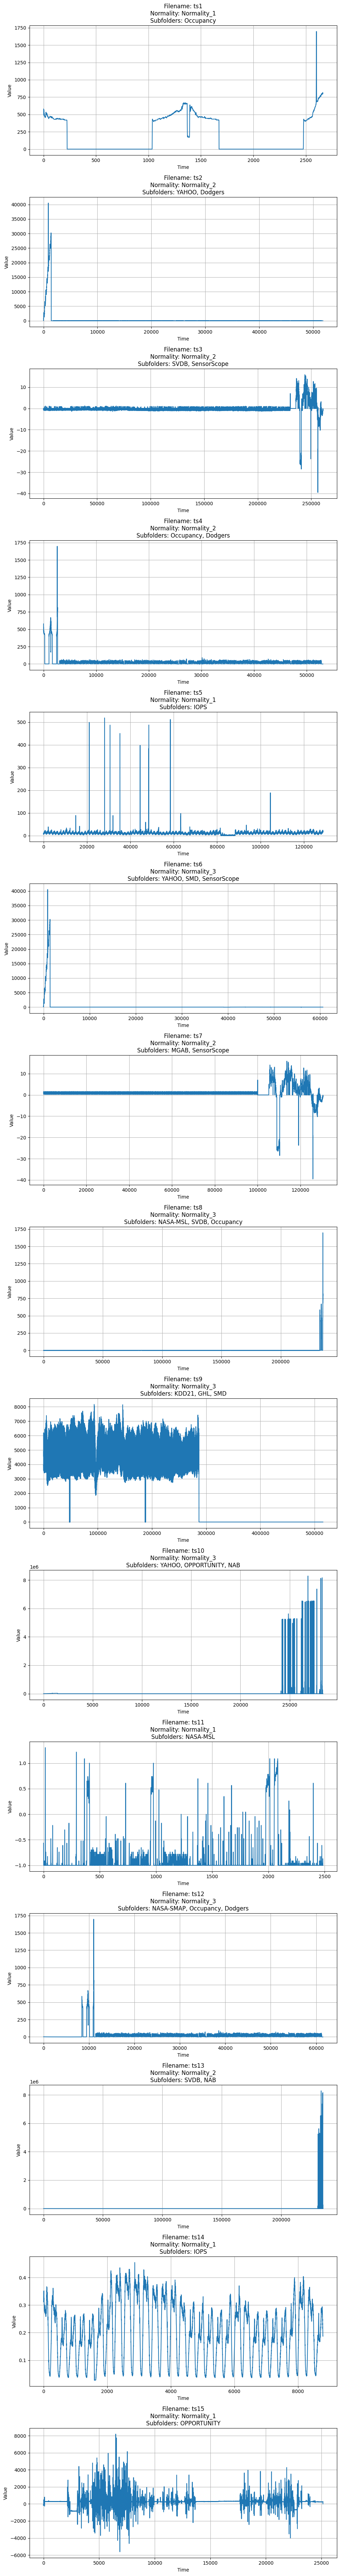

In [47]:
def plot_time_series_subplots(file_dict, data_folder):
    num_files = len(file_dict)
    fig, axs = plt.subplots(num_files, 1, figsize=(10, num_files * 5))

    if num_files == 1:
        axs = [axs]

    for idx, (filename, info) in enumerate(file_dict.items()):
        file_path = os.path.join(data_folder, filename)
        
        try:
            data = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
        
        time_series = data.iloc[:, 0]
        
        normality = info[0]
        subfolders = ", ".join(info[1:])
        
        axs[idx].plot(time_series)
        axs[idx].set_title(f"Filename: {filename}\nNormality: {normality}\nSubfolders: {subfolders}")
        axs[idx].set_xlabel('Time')
        axs[idx].set_ylabel('Value')
        axs[idx].grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the data
plot_time_series_subplots(new_files_dict, 'TS-Data-Files')